In [1]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score 

data = (r'C:\Users\clava\data_miners\ML_Model\model_df.csv')
model_df = pd.read_csv(data)

In [2]:
#model_df = model_df.drop([''])

In [3]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# merge duplicate zip code rows
#model_df = model_df.groupby(['ZIP_CODE'], as_index=False)['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST',
#                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
#                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#                     'REG_COUNTS'].sum()

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,795
07004,0,6,3,0,1,2,2621.0,122063.0,307
07005,0,1,10,0,1,1,5489.0,111946.0,445


In [4]:
model_df['EV_TOTAL'] = model_df.iloc[:, -9:-7].sum(axis=1)
model_df = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
                     'REG_COUNTS']]
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0,0
07001,0,1,0,1,0,1,0,5022.0,69849.0,173
07003,0,12,5,12,4,1,3,18577.0,78034.0,795
07004,0,6,3,6,0,1,2,2621.0,122063.0,307
07005,0,1,10,1,0,1,1,5489.0,111946.0,445
...,...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0,3413
99354,36,48,0,84,0,45,1,9175.0,73369.0,2082
99361,0,1,0,1,0,0,1,750.0,69118.0,100


In [52]:
model_df.REG_COUNTS.sum()

1662799

In [5]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 03266 to 99403
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2493 non-null   int64  
 1   EV_LEVEL_2                  2493 non-null   int64  
 2   EV_FAST                     2493 non-null   int64  
 3   EV_TOTAL                    2493 non-null   int64  
 4   NETWORK_TYPE_ChargePoint    2493 non-null   int64  
 5   NETWORK_TYPE_Non-Networked  2493 non-null   int64  
 6   NETWORK_TYPE_Other-Network  2493 non-null   int64  
 7   TOTAL_HOUSEHOLDS            2493 non-null   float64
 8   MEDIAN_INCOME               2493 non-null   float64
 9   REG_COUNTS                  2493 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 214.2+ KB


In [6]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000
mean,0.279182,8.221019,1.715604,8.500201,2.022062,0.697152,1.468111,8606.855195,73166.091456,666.987164
std,2.064343,14.277310,3.838397,14.614100,4.819944,1.474278,2.382783,6846.422036,30414.784624,1814.401805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3047.000000,52492.000000,2.000000
50%,0.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,7538.000000,65906.000000,89.000000
75%,0.000000,9.000000,1.000000,9.000000,2.000000,1.000000,2.000000,12502.000000,87311.000000,496.000000
max,48.000000,227.000000,38.000000,227.000000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show(close=None, block=None)>

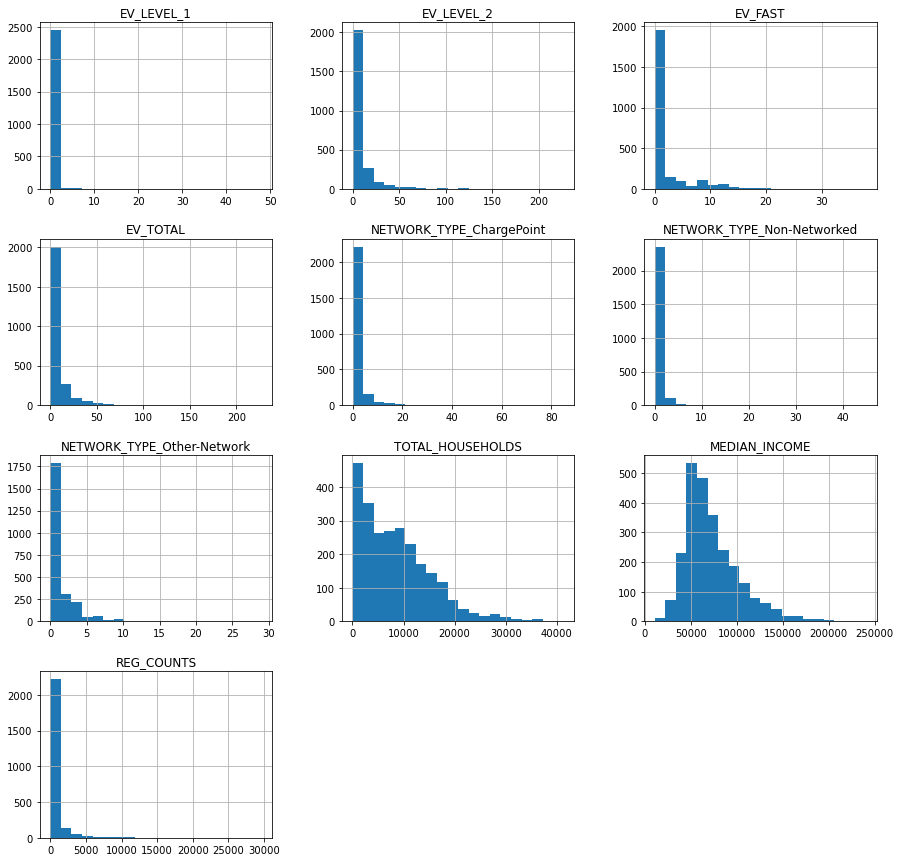

In [7]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

C:\Users\clava\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='REG_COUNTS', ylabel='Density'>

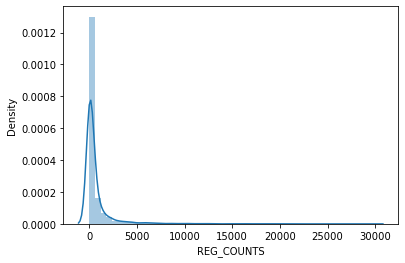

In [8]:
sns.distplot(model_df['REG_COUNTS'])

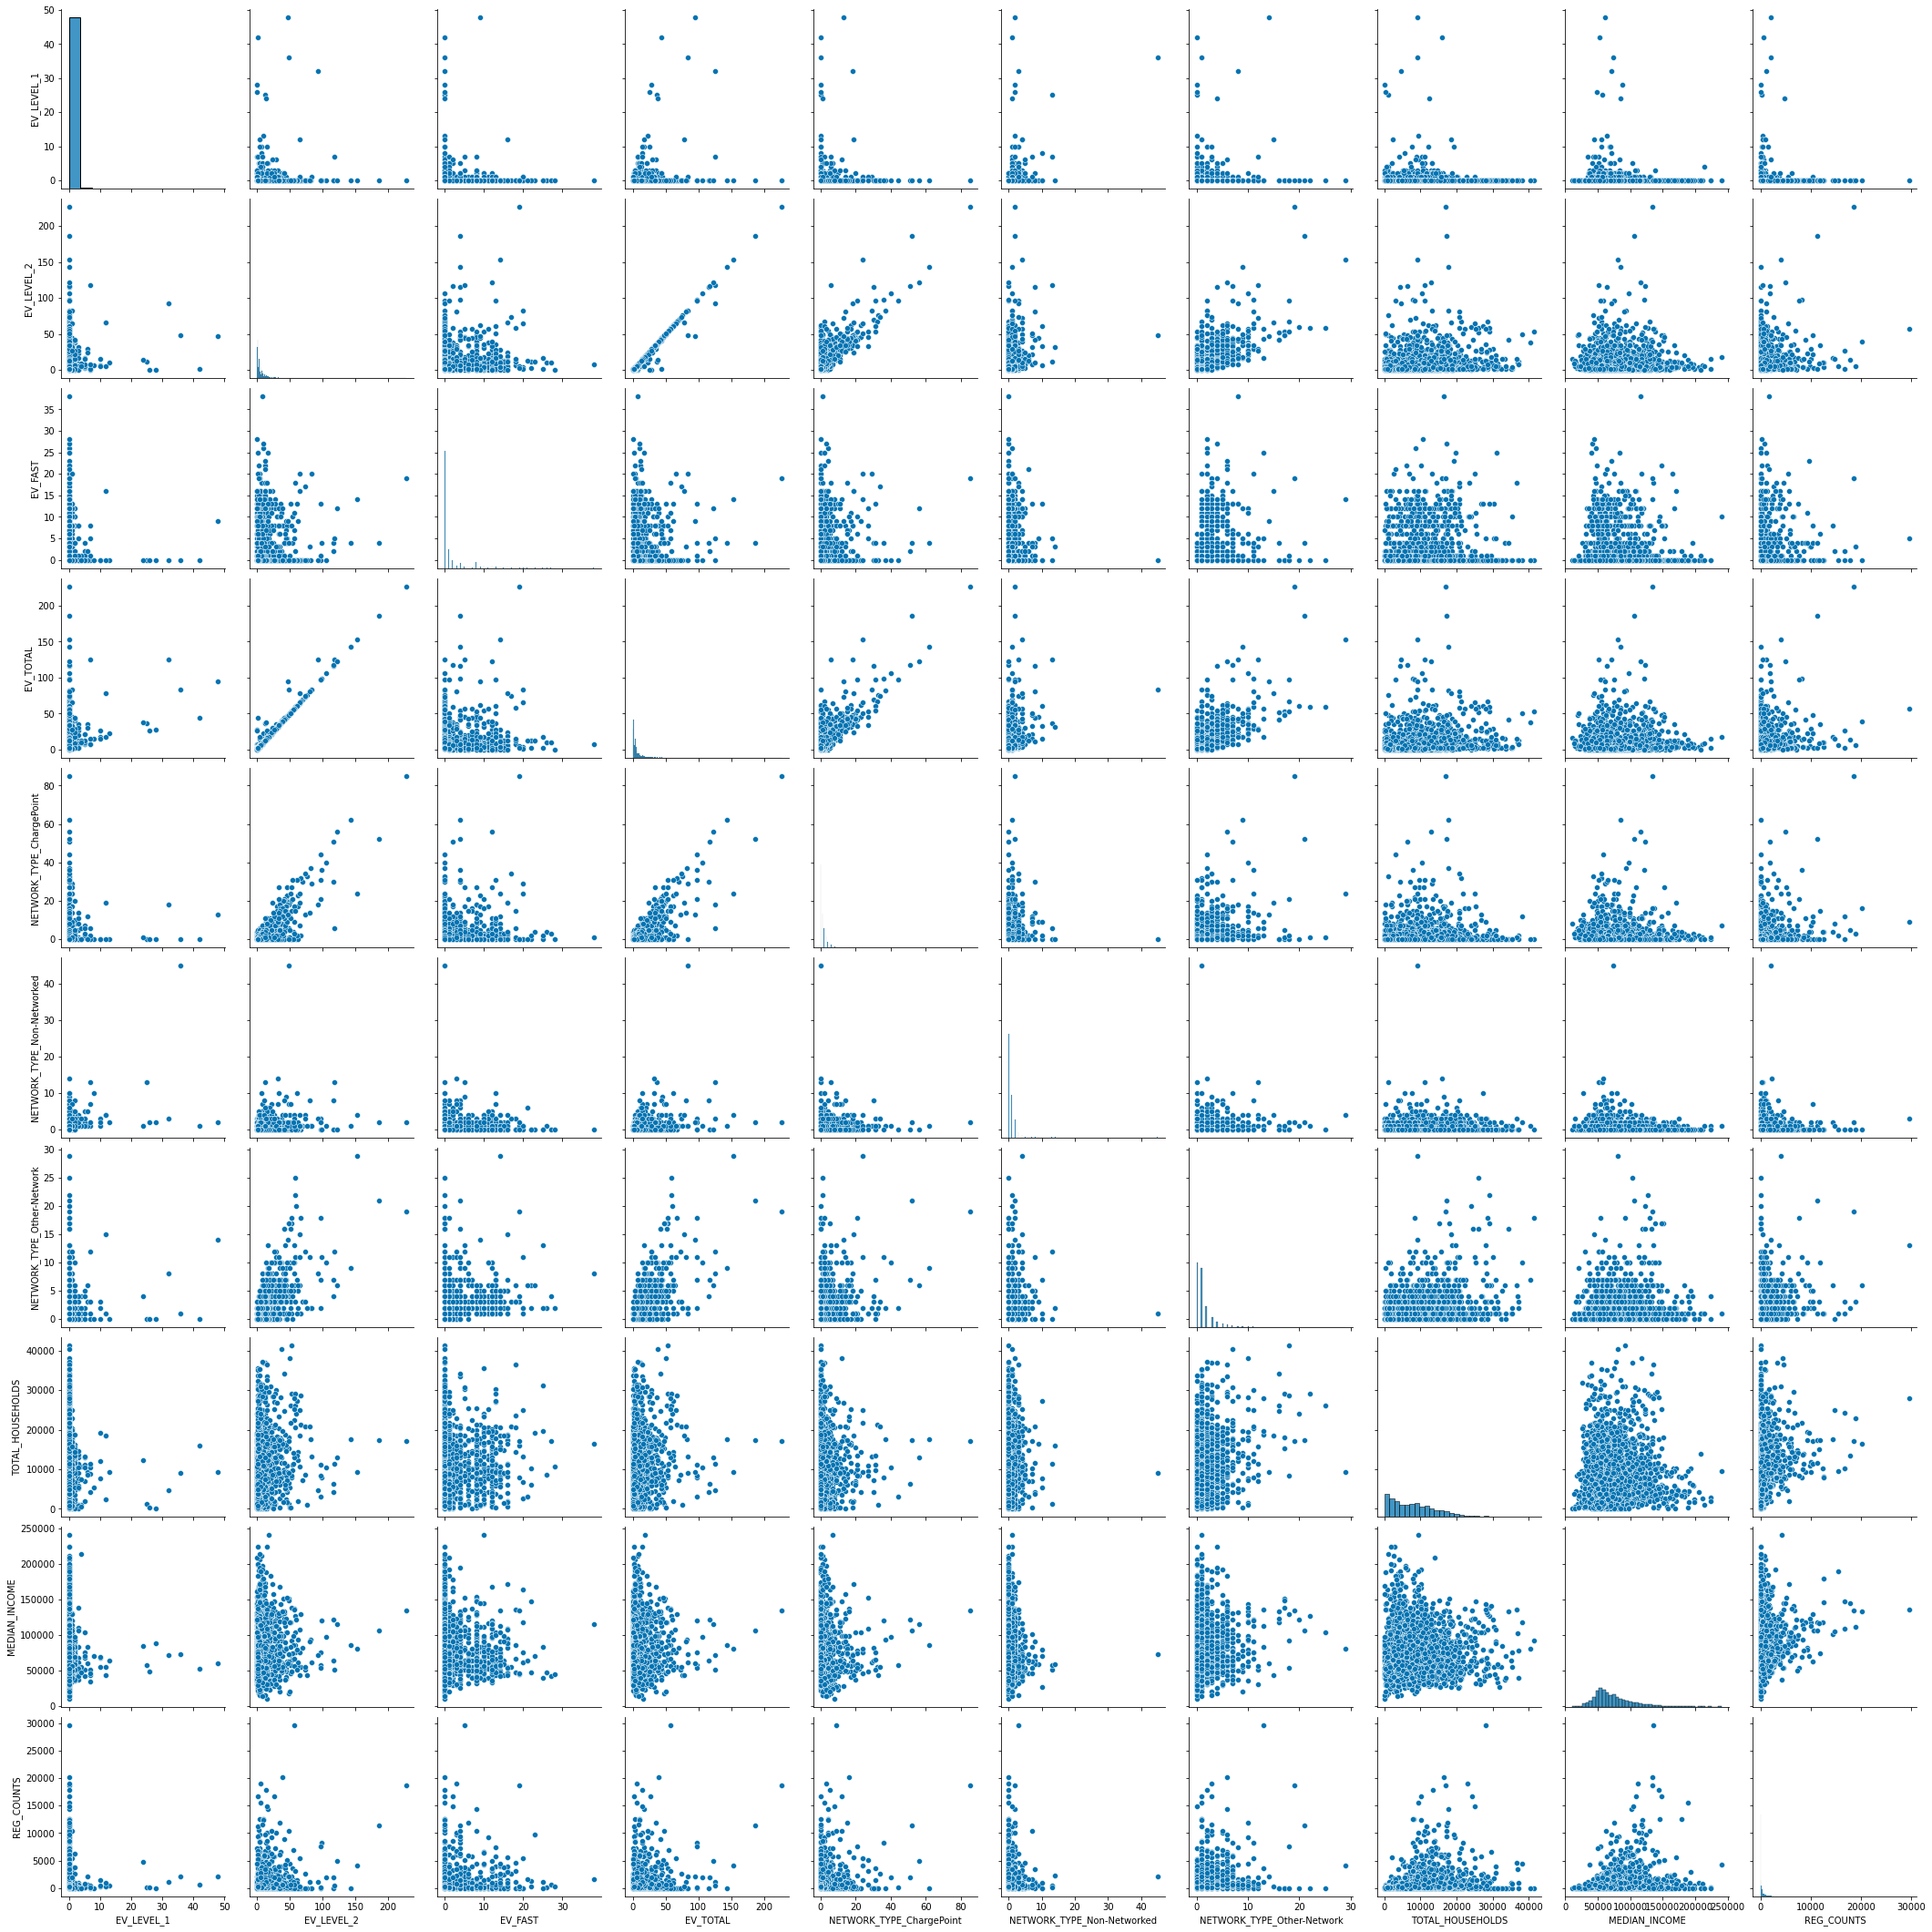

In [9]:
sns.set_palette('colorblind')
sns.pairplot(data=model_df, height=3)

In [10]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
NETWORK_TYPE_Other-Network    0.275864
TOTAL_HOUSEHOLDS              0.275418
MEDIAN_INCOME                 0.275283
EV_LEVEL_2                    0.271770
EV_TOTAL                      0.266710
NETWORK_TYPE_ChargePoint      0.248188
EV_FAST                       0.122623
NETWORK_TYPE_Non-Networked    0.040663
EV_LEVEL_1                    0.008519
Name: REG_COUNTS, dtype: float64

<AxesSubplot:>

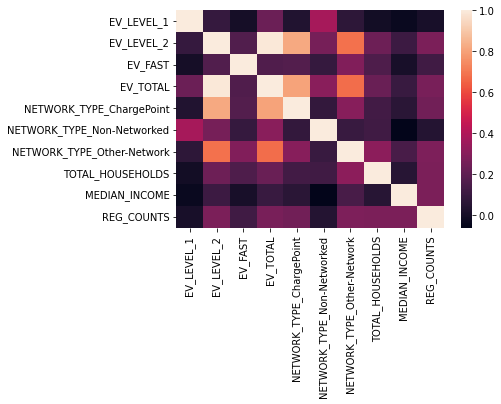

In [11]:
sns.heatmap(corr_matrix)

# Scaling & Normalization

In [12]:
#scaler = StandardScaler()

In [13]:
#scaled_data = scaler.fit_transform(model_df)

In [14]:
# scaled_df = pd.DataFrame(scaled_data, index=model_df.index, columns=model_df.columns)
# scaled_df.head()

In [15]:
#y = scaled_df.REG_COUNTS
y = model_df.REG_COUNTS
y.shape

(2493,)

In [16]:
#X = scaled_df.drop(['REG_COUNTS'], axis=1)
X = model_df.drop(['REG_COUNTS'], axis=1)
X.shape

(2493, 9)

In [17]:
# corr_matrix = scaled_df.corr()
# corr_matrix['REG_COUNTS'].sort_values(ascending=False)

# Linear Regression

In [18]:
#X_scaled = scaled_df.EV_TOTAL.values.reshape(-1,1)

In [19]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(823,)


ValueError: x and y must be the same size

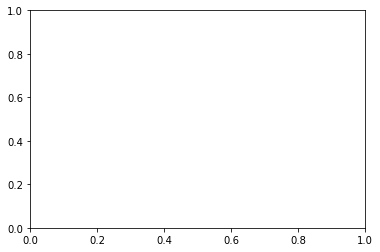

In [22]:
plt.scatter(X_test, y_test)
plt.xlabel('Total EV Chargers')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Multivariable Linear Regression

In [23]:
multi_X = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    'NETWORK_TYPE_ChargePoint','NETWORK_TYPE_Non-Networked','NETWORK_TYPE_Other-Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME']]

# multi_X = model_df[['EV_LEVEL_2', 'EV_FAST']]


multi_X

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME
ZIP_CODE,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0
07001,0,1,0,1,0,1,0,5022.0,69849.0
07003,0,12,5,12,4,1,3,18577.0,78034.0
07004,0,6,3,6,0,1,2,2621.0,122063.0
07005,0,1,10,1,0,1,1,5489.0,111946.0
...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0
99354,36,48,0,84,0,45,1,9175.0,73369.0
99361,0,1,0,1,0,0,1,750.0,69118.0


In [24]:
# Split the data into training/testing sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, y, test_size=0.33, random_state=42)

In [25]:
# Train the model using the training sets
multi_lin = LinearRegression()
multi_lin.fit(multi_X_train, multi_y_train)

LinearRegression()

In [26]:
# Make predictions using the testing set
multi_y_pred = multi_lin.predict(multi_X_test)
print(multi_y_pred.shape)

(823,)


# Performance

In [27]:
print('Intercept:', multi_lin.intercept_)
print('Coefficients:', multi_lin.coef_)

Intercept: -1188.3243096630667
Coefficients: [ 1.49550397e+01 -2.54523185e+01 -4.27829651e+00 -1.04972787e+01
  1.41007456e+02  6.04562945e+01  1.92574833e+02  4.94632034e-02
  1.52723925e-02]


In [28]:
explained_variance_score(multi_y_test, multi_y_pred)

0.20663832592249565

In [29]:
max_error(multi_y_test, multi_y_pred)

13829.544969765531

In [30]:
mean_absolute_error(multi_y_test, multi_y_pred)

738.0466980334065

In [31]:
mean_squared_error(multi_y_test, multi_y_pred, squared=False)

1520.395907103289

In [32]:
r2_score(multi_y_test, multi_y_pred)

0.20659258395690772

In [33]:
# intercept
print('Intercept:', multi_lin.intercept_)
# The coefficients
print("Coefficients: \n", multi_lin.coef_)
# explained variance score
print("Explained Variance Score: %.2f \n" % explained_variance_score(multi_y_test, multi_y_pred))
# Max Error
print("Max Error: %.2f \n" % max_error(multi_y_test, multi_y_pred))
# Mean Absolute Error
print("Mean Absolute Error: %.2f \n" % mean_absolute_error(multi_y_test, multi_y_pred))
# The mean squared error
print("Mean Squared error: %.2f \n" % mean_squared_error(multi_y_test, multi_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(multi_y_test, multi_y_pred))

Intercept: -1188.3243096630667
Coefficients: 
 [ 1.49550397e+01 -2.54523185e+01 -4.27829651e+00 -1.04972787e+01
  1.41007456e+02  6.04562945e+01  1.92574833e+02  4.94632034e-02
  1.52723925e-02]
Explained Variance Score: 0.21 

Max Error: 13829.54 

Mean Absolute Error: 738.05 

Mean Squared error: 2311603.71 

Coefficient of determination: 0.21


#Visualizing Predictions

In [34]:
y_pred = multi_lin.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head(15)

,Prediction,Actual
0,-86.432403,38
1,67.217218,119
2,81.809624,187
3,656.937326,143
4,1021.544826,146
5,322.022186,982
6,853.690877,757
7,240.248477,0
8,-298.864997,0
9,780.497413,1134


In [35]:
predictions_df = pd.DataFrame(multi_y_pred, index=multi_X_test.index, columns=["REG_PREDICT"])

In [36]:
predictions_df.head()

,REG_PREDICT
ZIP_CODE,
97914,-86.432403
97138,67.217218
55411,81.809624
97420,656.937326
49426,1021.544826


In [43]:
ml_out_df = model_df.merge(predictions_df, how='left', on='ZIP_CODE')
ml_out_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS,REG_PREDICT
ZIP_CODE,,,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0,0,NaN
07001,0,1,0,1,0,1,0,5022.0,69849.0,173,NaN
07003,0,12,5,12,4,1,3,18577.0,78034.0,795,NaN
07004,0,6,3,6,0,1,2,2621.0,122063.0,307,NaN
07005,0,1,10,1,0,1,1,5489.0,111946.0,445,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0,3413,1183.522265
99354,36,48,0,84,0,45,1,9175.0,73369.0,2082,NaN
99361,0,1,0,1,0,0,1,750.0,69118.0,100,60.995554


In [49]:
ml_out_df = ml_out_df.dropna(subset=['REG_PREDICT'])
ml_out_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS,REG_PREDICT
ZIP_CODE,,,,,,,,,,,
07016,0,2,0,2,1,0,0,8894.0,129781.0,594,1302.776054
07028,0,2,0,2,1,0,0,2495.0,198625.0,440,2037.673605
07040,0,1,0,1,0,1,0,7945.0,138870.0,1032,1350.044685
07052,0,12,2,12,3,0,3,16414.0,105584.0,1492,1796.880110
07055,0,4,0,4,2,0,0,19854.0,40944.0,209,557.247493


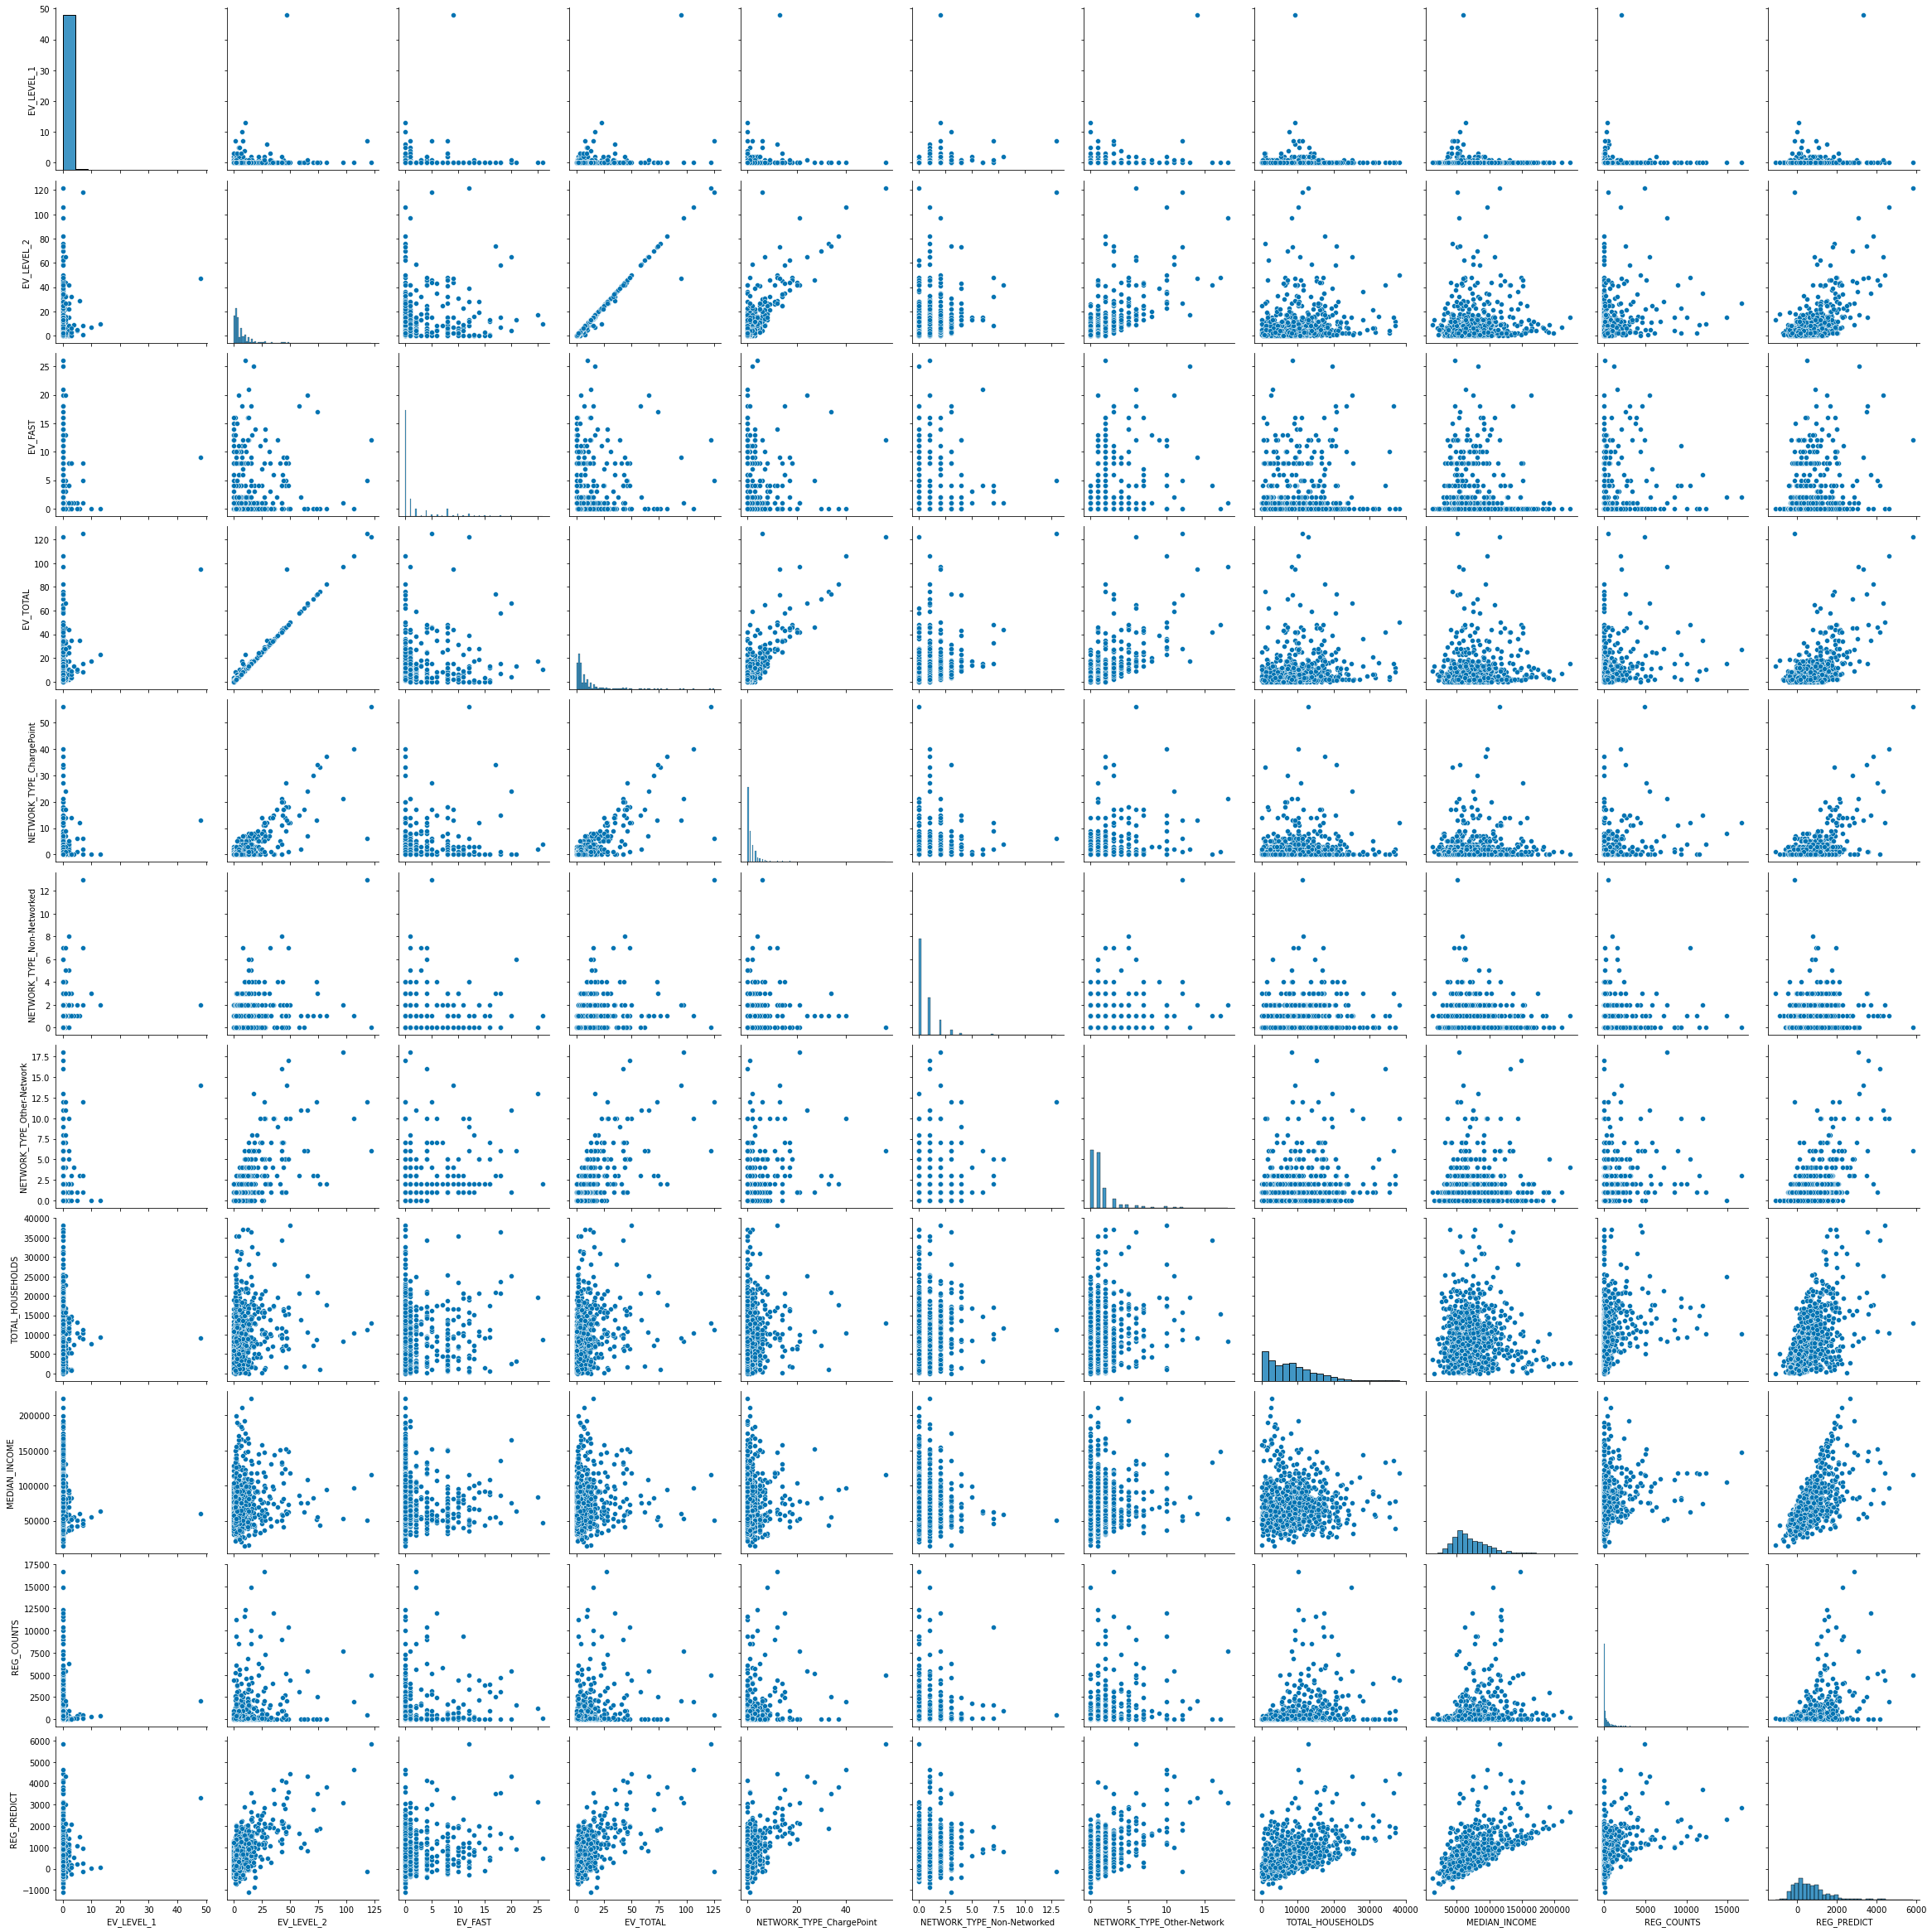

In [45]:
sns.set_palette('colorblind')
sns.pairplot(data=ml_out_df, height=3)

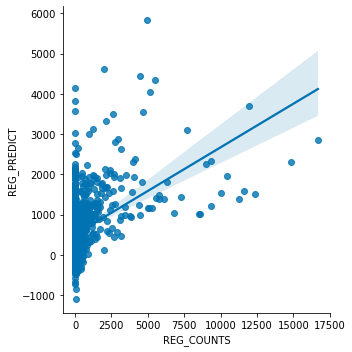

In [46]:
sns.lmplot(x="REG_COUNTS", y="REG_PREDICT", data=ml_out_df)

C:\Users\clava\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


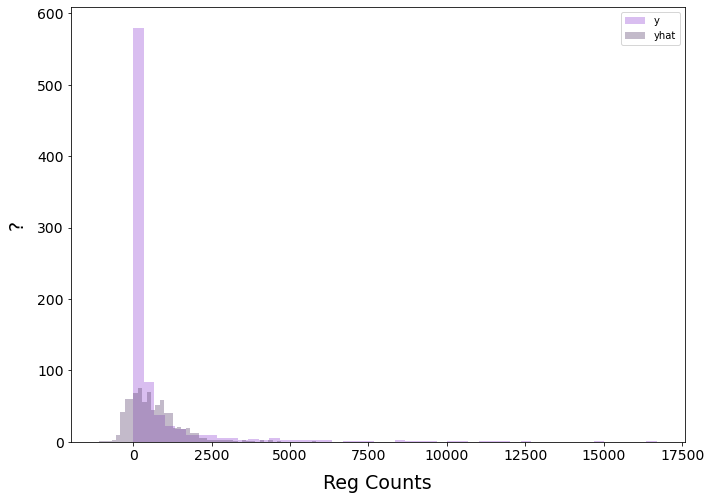

In [47]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot((ml_out_df.REG_COUNTS), kde=False, color='#A15EDB', bins=50, label='y')
sns.distplot(y_pred, kde=False, color='#69547C', bins=50, label='yhat')

plt.xlabel('Reg Counts', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('?', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');